<a href="https://colab.research.google.com/github/121deepti/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

The project aims to predict the 10-year risk of future coronary heart disease (CHD) for patients in Framingham, Massachusetts. A dataset containing demographic, behavioral, and medical risk factors for over 4000 patients is used to build a predictive model. The model will use machine learning techniques to analyze the provided information and make accurate CHD risk predictions. The goal of the project is to develop a tool for early detection and prevention of CHD, addressing a significant public health concern. The outcome of the project will be a predictive model that can be used by healthcare providers to make informed decisions regarding patient care.

There were approximately 3390 records and 17 attributes in the dataset.
We started by importing the dataset, and necessary libraries and conducted exploratory data analysis (EDA).
Outliers and null values were removed from the raw data and treated. Data were transformed to ensure that it was compatible with machine learning models.
We handled target class imbalance using SMOTE.
Then finally cleaned and scaled data was sent to 8 various models, the metrics were made to evaluate the model, and we tuned the hyperparameters to make sure the right parameters were being passed to the model.
When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, focusing more on the Recall score and F1 score.
It is categorically unacceptable to miss identifying a particular patient or to classify a particular patient as healthy (false negative). That is why we have preferred recall score.

# **GitHub Link -**

https://github.com/121deepti/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb

# **Problem Statement**


**What exactly are cardiovascular diseases?**

A group of conditions affecting the heart and blood vessels is known as cardiovascular diseases. They consist of heart disease, which affects the blood vessels that supply the heart muscle. The majority of the time, a blockage that prevents blood from flowing to the heart or brain is to blame for heart attacks and strokes, which are typically sudden events. A buildup of fatty deposits on the inner walls of the blood vessels that supply the heart or brain is the most common cause of this.

The goal of the classification is to predict the 10-year risk of future coronary heart disease (CHD) for patients. The issue of coronary heart disease is a significant public health concern and early prediction of CHD risk is crucial for preventative measures. The dataset is from an ongoing cardiovascular study on residents of Flamingham, Massachusetts. The data set includes over 4000 records and 16 attributes, each of which is a potential risk factor, including demographic, behavioral, and medical risk factors.

**WHY DO WE NEED CARDIOVASCULAR RISK PREDICTION?**

The greatest obstacle facing the medical industry is accurately predicting and diagnosing heart disease. Heart diseases are influenced by numerous factors.
Heart disease is even referred to as a "silent killer" because it kills people without showing any obvious symptoms.
When high-risk patients are diagnosed with heart disease early, it is easier to make lifestyle changes, which in turn lowers the risk of complications.
Based on the way people currently live, machine learning can help predict the likelihood of heart disease in the coming years.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import  make_scorer,f1_score,roc_curve,accuracy_score,classification_report,confusion_matrix,roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from imblearn.combine import SMOTETomek

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/my_data/data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.sample(3)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

In [ ]:
#Missing values percentage
round((df.isna().sum().sort_values(ascending=False))*100/df.shape[0],2)

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
!pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

### What did you know about your dataset?

There are 3390 rows and 17 columns in the dataset. No duplicates are found in the dataset.Some Null values are observed in the features.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description

The dataset provides the patients’ information. It includes over 3,390 records and 17 attributes(from which TenYearCD is the target column). Variables Each attribute is a potential risk factor. There are demographic, behavioural, and medical risk factors

Demographic:
*   Sex: male or female ("M" or "F")
*   Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
*   Education: The level of education of the patient (categorical values - 1,2,
3,4)

Behavioral:<br>
*   is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day

Medical(History):


*   BP Meds: whether or not the patient was on blood pressure medication
*   Prevalent Stroke: whether or not the patient had previously had a stroke
*   Prevalent Hyp: whether or not the patient was hypertensive
*   Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
*   Tot Chol: total cholesterol level
*   Sys BP: systolic blood pressure
*   Dia BP: diastolic blood pressure
*   BMI: Body Mass Index
*   Heart Rate: heart rate
*   Glucose: glucose level
*   TenYearCHD(**Target Variable**): 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  print("No of Unique Values in ", i, " is:", df[i].nunique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [4]:
#create a copy of dataset
df_eda=df.copy()

In [5]:
#Prevalent stroke effect on heart disease
print("Analysis in %age form\n")
pd.crosstab(df_eda.prevalentStroke,df_eda.TenYearCHD).apply(lambda r: round((r/r.sum()),2), axis=1)

Analysis in %age form



TenYearCHD,0,1
prevalentStroke,,
0,0.85,0.15
1,0.55,0.45


In [6]:
#Prevalent Hypertension impact on heart disease
print(pd.crosstab(df_eda.prevalentHyp,df_eda.TenYearCHD))
print('\n')
print("Analysis in %age form\n")
pd.crosstab(df_eda.prevalentHyp,df_eda.TenYearCHD).apply(lambda r: round((r/r.sum()),2), axis=1)

TenYearCHD       0    1
prevalentHyp           
0             2065  256
1              814  255


Analysis in %age form



TenYearCHD,0,1
prevalentHyp,,
0,0.89,0.11
1,0.76,0.24


In [7]:
#Creating age bins and impact on heart disease
df_eda['age_bins'] = pd.cut(x=df_eda['age'], bins=[30, 35, 40, 45,50,55,60,65,70])
print("Analysis in %age form\n")
pd.crosstab(df_eda.age_bins,df_eda.TenYearCHD).apply(lambda r: round((r/r.sum()),2), axis=1)

Analysis in %age form



TenYearCHD,0,1
age_bins,,
"(30, 35]",0.96,0.04
"(35, 40]",0.95,0.05
"(40, 45]",0.91,0.09
"(45, 50]",0.87,0.13
"(50, 55]",0.83,0.17
"(55, 60]",0.77,0.23
"(60, 65]",0.73,0.27
"(65, 70]",0.60,0.40


In [8]:
#Creating BMI bins and finding its relation with heart disease
df_eda['BMI_bins'] = pd.cut(x=df_eda['BMI'], bins=[15,25,35,45,55,65])
print(pd.crosstab(df_eda.BMI_bins,df_eda.TenYearCHD))
print('\n')
print("Analysis in %age form\n")
pd.crosstab(df_eda.BMI_bins,df_eda.TenYearCHD).apply(lambda r: round((r/r.sum()),2), axis=1)

TenYearCHD     0    1
BMI_bins             
(15, 25]    1361  192
(25, 35]    1434  294
(35, 45]      74   17
(45, 55]       3    0
(55, 65]       0    1


Analysis in %age form



TenYearCHD,0,1
BMI_bins,,
"(15, 25]",0.88,0.12
"(25, 35]",0.83,0.17
"(35, 45]",0.81,0.19
"(45, 55]",1.00,0.00
"(55, 65]",0.00,1.00


In [9]:
#Creating cigrette bins and finding its relation with heart disease
df_eda['cig_bins'] = pd.cut(x=df_eda['cigsPerDay'], bins=[10, 20,30,40,50,60])

print(pd.crosstab(df_eda.cig_bins,df_eda.TenYearCHD))
print('\n')
print("Analysis in %age form\n")
pd.crosstab(df_eda.cig_bins,df_eda.TenYearCHD).apply(lambda r: round((r/r.sum()),2), axis=1)

TenYearCHD    0    1
cig_bins            
(10, 20]    671  134
(20, 30]    183   42
(30, 40]     59   21
(40, 50]     38   12
(50, 60]      6    2


Analysis in %age form



TenYearCHD,0,1
cig_bins,,
"(10, 20]",0.83,0.17
"(20, 30]",0.81,0.19
"(30, 40]",0.74,0.26
"(40, 50]",0.76,0.24
"(50, 60]",0.75,0.25


In [10]:
#Relation of Sex with heart disease
print("Analysis in %age form\n")
pd.crosstab(df_eda.sex,df_eda.TenYearCHD).apply(lambda r: round((r/r.sum()),2), axis=1)

Analysis in %age form



TenYearCHD,0,1
sex,,
F,0.88,0.12
M,0.81,0.19


In [11]:
#Diebetes impact on heart disease
print("Analysis in %age form\n")
pd.crosstab(df_eda.diabetes,df_eda.TenYearCHD).apply(lambda r: round((r/r.sum()),2), axis=1)

Analysis in %age form



TenYearCHD,0,1
diabetes,,
0,0.86,0.14
1,0.62,0.38


In [12]:
#BP medication impact on heart disease
print("Analysis in %age form\n")
pd.crosstab(df_eda.BPMeds,df_eda.TenYearCHD).apply(lambda r: round((r/r.sum()),2), axis=1)

Analysis in %age form



TenYearCHD,0,1
BPMeds,,
0.0,0.85,0.15
1.0,0.67,0.33


In [13]:
#Creating cholestrol bins and finding its relation with heart disease
df_eda['chol_bins'] = pd.cut(x=df_eda['totChol'], bins=[100, 200,300,400,500,600,700])
print(pd.crosstab(df_eda.chol_bins,df_eda.TenYearCHD))
print('\n')
print("Analysis in %age form\n")
pd.crosstab(df_eda.chol_bins,df_eda.TenYearCHD).apply(lambda r: round((r/r.sum()),2), axis=1)

TenYearCHD     0    1
chol_bins            
(100, 200]   632   72
(200, 300]  2009  371
(300, 400]   202   57
(400, 500]     4    3
(500, 600]     0    1
(600, 700]     1    0


Analysis in %age form



TenYearCHD,0,1
chol_bins,,
"(100, 200]",0.90,0.10
"(200, 300]",0.84,0.16
"(300, 400]",0.78,0.22
"(400, 500]",0.57,0.43
"(500, 600]",0.00,1.00
"(600, 700]",1.00,0.00


In [14]:
#Creating heartRate bins and finding its relation with heart disease
df_eda['heartRate_bins'] = pd.cut(x=df_eda['heartRate'], bins=[40,60,80,100,120,140,160])
print(pd.crosstab(df_eda.heartRate_bins,df_eda.TenYearCHD))
print('\n')
print("Analysis in %age form\n")
pd.crosstab(df_eda.heartRate_bins,df_eda.TenYearCHD).apply(lambda r: round((r/r.sum()),2), axis=1)

TenYearCHD         0    1
heartRate_bins           
(40, 60]         294   43
(60, 80]        1790  317
(80, 100]        727  135
(100, 120]        61   15
(120, 140]         6    0
(140, 160]         1    0


Analysis in %age form



TenYearCHD,0,1
heartRate_bins,,
"(40, 60]",0.87,0.13
"(60, 80]",0.85,0.15
"(80, 100]",0.84,0.16
"(100, 120]",0.80,0.20
"(120, 140]",1.00,0.00
"(140, 160]",1.00,0.00


In [15]:
#Creating Glucose bins and finding its relation with heart disease
df_eda['Glucose_bins'] = pd.cut(x=df_eda['glucose'], bins=[40,150,250,350,450])
# We can check the frequency of each bin
print(pd.crosstab(df_eda.Glucose_bins,df_eda.TenYearCHD))
print('\n')
print("Analysis in %age form\n")
pd.crosstab(df_eda.Glucose_bins,df_eda.TenYearCHD).apply(lambda r: round((r/r.sum()),2), axis=1)

TenYearCHD       0    1
Glucose_bins           
(40, 150]     2593  450
(150, 250]      15   11
(250, 350]       4    8
(350, 450]       1    3


Analysis in %age form



TenYearCHD,0,1
Glucose_bins,,
"(40, 150]",0.85,0.15
"(150, 250]",0.58,0.42
"(250, 350]",0.33,0.67
"(350, 450]",0.25,0.75


In [16]:
#Statics about glucose when the person is diabetic
df_eda.loc[df_eda.diabetes==1]['glucose'].describe()

count     84.000000
mean     171.964286
std       85.267891
min       47.000000
25%      111.500000
50%      150.000000
75%      217.750000
max      394.000000
Name: glucose, dtype: float64

In [17]:
#Statics about glucose when the person is non-diabetic
df_eda.loc[df_eda.diabetes==0]['glucose'].describe()

count    3002.000000
mean       79.571619
std        13.066705
min        40.000000
25%        71.000000
50%        78.000000
75%        86.000000
max       163.000000
Name: glucose, dtype: float64

In [18]:
#Number of patients at heart risk and safe
print(len(df_eda[df_eda['TenYearCHD']==1]))
print(len(df_eda[df_eda['TenYearCHD']==0]))

511
2879


In [19]:
#smoking impact on heart disease
print(pd.crosstab(df_eda.is_smoking,df_eda.TenYearCHD))
print('\n')
print("Analysis in %age form\n")
pd.crosstab(df_eda.is_smoking,df_eda.TenYearCHD).apply(lambda r: round((r/r.sum()),2), axis=1)

TenYearCHD     0    1
is_smoking           
NO          1467  236
YES         1412  275


Analysis in %age form



TenYearCHD,0,1
is_smoking,,
NO,0.86,0.14
YES,0.84,0.16


In [20]:
#Creating seperate list of numeric and categorical columns
numeric_cols=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
cate_cols=['sex','education','is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']

### What all manipulations have you done and insights you found?

These are some important insights-
*   The persons who have stroke history has a strong chance of heart disease.
*   Hyper tension patients has more chance of heart disease.
*  I have created bins for age group and found that age has strong correlation with heart disease i.e. as the age increases the chances of heart disease increases too.
*   I have created a column cigeratte bins and found that a large number of people is using 10-20 cigrette in a day. As their number of cigrettes increased the chances of heart disease also increased.
* There are more males are suffered from heart disease.  
*  A diabetic and high BP and high blood sugar(glucose) patient having strong chances of heart disease .
*  There are a lot of persons belonging to 200-300 cholestrol range. As the cholestrol level goes up the chances of heart disease also goes up .
*  Increased heart rate increases the risk of heart diseases.
*  The patients at risk ~  500 but in safe circle ~ 2900 so the problem is totally unbalanced
*   The smokers having high chance of heart disease. According to research,About 20% of deaths from heart disease in the U.S. are directly related to smoking.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###**Univariate Analysis**

#### Chart - 1 Count plot of Categorical columns

In [ ]:
# Chart - 1
fig = plt.figure(figsize=(12, 10))
for index,item in enumerate(cate_cols):
  plt.subplot(3,3,index+1)
  ax = fig.gca()
  plt.xlabel(item)
  sns.countplot(x =item, data = df,hue='TenYearCHD')
  for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
  plt.tight_layout()
  print("\n")

##### 1. Why did you pick the specific chart?

This chart helps in analyzing the categorical features count in the data set.

##### 2. What is/are the insight(s) found from the chart?

The findings are:
*   There are more number of females as compared to male.
*   Almost equal ratio between smoker and non-smoker.
*   There are more number of non-BP patients as compared to BP patients.
*   The persons who history of prevalent stroke are very less.
*   Hypertension and Diabetic patients are less in number.
*   There are more number of patients who are in less risk zone.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 2 Pie charts for Categorical Columns

In [ ]:
# Chart - 2
fig = plt.figure(figsize=(8, 8))
for index,item in enumerate(cate_cols):
  plt.subplot(3,3,index+1)
  ax = fig.gca()
  df[item].value_counts().plot(kind='pie',autopct='%1.0f%%')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

This chart shows the percentage distribution of categorical data

##### 2. What is/are the insight(s) found from the chart?

The ratio is as follows:
*   57% female and 43% males
*   50% smokers and 50% non-smokers
*   97% NonBP and NonDiebitic patients while 3% BP and Diebitic patients
*   99% have No Stroke history
*   68% non-Hypertension Patients  
*   85% are under safe category
*   42% people belong to education category 1 and category 4 has lowest 11% people.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3  Histogram for Numerical columns

In [ ]:
# Chart - 3
fig = plt.figure(figsize=(12, 10))
for index,item in enumerate(numeric_cols):
  plt.subplot(3,3,index+1)
  ax = fig.gca()
  plt.xlabel(item)
  sns.distplot(df[item])
  sk=round(df[item].skew(),2)
  ax=fig.gca()
  ax.axvline(df[item].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(df[item].median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(item+'  skewness'+str(sk))
  plt.tight_layout()


##### 1. Why did you pick the specific chart?

This chart displays the PDF of numerical variables with their skewness.

##### 2. What is/are the insight(s) found from the chart?

Here are some important findings-
*   Except cigs_per_day all other are following Normal or almost Normal Distribution
*   All features are Positively skewed except age but cigs_per_day and BMI highly skewed but Glusose is very high skewed ~6.14.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Log Transformation of skewed variables

In [ ]:
# Chart - 4
fig = plt.figure(figsize=(12, 10))
for index,item in enumerate(numeric_cols):
  plt.subplot(3,3,index+1)
  ax = fig.gca()
  plt.xlabel(item)
  if item=='age':
    sns.distplot(df[item])
    sk=round(df[item].skew(),2)
    ax=fig.gca()
    ax.axvline(df[item].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[item].median(), color='cyan', linestyle='dashed', linewidth=2)
  else:
    sns.distplot(np.log1p(df[item]))
    sk=np.log1p(round(df[item].skew(),2))
    ax=fig.gca()
    ax.axvline(np.log1p(df[item]).mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(np.log1p(df[item]).median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(item+'  skewness'+str(sk))
plt.tight_layout()

##### 1. Why did you pick the specific chart?

This chart helps to show the variable distribution after log transformation.

##### 2. What is/are the insight(s) found from the chart?

After applying log transformation, BMI skewness is reduced to ~ 0.7,Cigs perday to ~0.8 and Glucose to ~1.97.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 Box plot Analysis

In [ ]:
# Chart - 5
fig = plt.figure(figsize=(6, 4))
for index,item in enumerate(numeric_cols):
  plt.subplot(3,3,index+1)
  ax = fig.gca()
  plt.xlabel(item)
  sns.boxplot(x =item, data = df)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

This chart analyses the outliers present in numerical features.

##### 2. What is/are the insight(s) found from the chart?

Here the outcomes of this chart-
*   "Age"-No outlier is present
*   "cigs Per Day" -Two outliers are present beyond the upper limit.
*   "totChol", "diaBP","heartRate" and "glucose"-Many outliers are present beyond the upper limit and some are present on the lower boundary too.
*   "SysBP" and "BMI"-Many outliers are present beyond the upper boundary.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Outliers can mislead the analysis of data that can give wrong signals to the business.

###**Bivariate Analysis**

#### Chart - 6 Relation of SystolicBP and diastolicBP

In [ ]:
# Chart - 6
print (numeric_cols)
print(cate_cols)
fig = plt.figure(figsize=(6, 4))
sns.scatterplot(data=df,x='sysBP',y='diaBP')

##### 1. Why did you pick the specific chart?

This chart shows the relationship between sysBP and diaBP.

##### 2. What is/are the insight(s) found from the chart?

There is linear relationship between sysBP and diaBP.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

sysBP and diaBP are crucial factor in determining the risk of heart disease, so they should be in controllled manner.

#### Chart - 7 Bar graphs for categorical vs numerical features analysis

In [ ]:
# Chart - 7
index=1
fig = plt.figure(figsize=(12,10))
for x in cate_cols[0:-1]:
  for y in numeric_cols:
    plt.subplot(7,8,index)
    ax = fig.gca()
    sns.barplot(data=df,x=x,y=y)
    index+=1
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

This chart reflects the relationship between numerical and categorical variables.

##### 2. What is/are the insight(s) found from the chart?

These are some of the takeaway from the above analysis:
*   According to Sex, Males are more smokers than females.
*   Education 1.0 has high ratio of age,BMI and glucose level. education level 2.0 has more smokers.
*  There are high number of young smokers. They have low statics(positive) as compared to old age smokers but their high rate is higher.
*   The persons on BP medication are old age persons and having higher statics(negative) as compared to young man but they are less smokers comparatively.
*   The persons having stroke history are older and having higher BP,glucose and BMI but cigeratte consuption and heart rate is lower comparatively.
*   HyperTension and diabetic patients are the older one having all the statics on higher(negative)side except smoking.
    <p>In short, age is a crucial factor in determining risk. Young age are more involved in smoking but due to their age they are in safe zone.
    According to studies,an older heart rests at a lower heart rate compared to when you were younger thats why this pattern is observed in the dataset

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This analysis helps in recognizing the crucial factors that have strong infulence in determing heart disease.

#### Chart - 8 Boxplot analysis of categorical variable w.r.t to numerical variable

In [ ]:
# Chart - 8
fig = plt.figure(figsize=(10, 12))
plt.subplot(5,4,1)
ax = fig.gca()
sns.boxplot(data=df,x='cigsPerDay',y='is_smoking')

plt.subplot(5,4,2)
ax = fig.gca()
sns.boxplot(data=df,y='glucose',x='diabetes')

plt.subplot(5,4,3)
ax = fig.gca()
sns.boxplot(data=df,y='sysBP',x='BPMeds')

x=['prevalentStroke','prevalentHyp','diabetes']
for i,item in enumerate(x):
  plt.subplot(5,4,i+4)
  ax = fig.gca()
  sns.boxplot(data=df,y='sysBP',x=item)

x=['prevalentStroke','prevalentHyp','diabetes','TenYearCHD','BPMeds','sex']
for i,item in enumerate(x):
  plt.subplot(5,4,i+7)
  ax = fig.gca()
  sns.boxplot(data=df,y='BMI',x=item)

x=['prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
for i,item in enumerate(x):
  plt.subplot(5,4,i+13)
  ax = fig.gca()
  sns.boxplot(data=df,y='heartRate',x=item)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

This helps in understanding the presence of outliers in various sceniors.

##### 2. What is/are the insight(s) found from the chart?

These are the insights as per my undersatnding
*   Some persons are smoking beyond the limit.
*   In case of Non-Diebitic persons lot of outliers are present in their glucose level.
*   Persons not on BP medication, no stroke history and non-diebitic having a lot high range of outliers for sysBP are present but high range of outliers are seen in prevalent as well as non prevalent hypertension patients.
*   In BMI case, high range of outliers are present in high risk and low risk patients.BP medicated ,Males having lesser outliers comparatively.No stroke history patients,Non Diebitic having higher outliers.For HyperTension or not BMI showing high range of outliers present.
*   In HeartRate case,Non prevalent stroke,Non diabetic having higher range of outliers,For HyperTension or not Heart Rate showing high range of outliers present and same in case of risk factor.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Persons not on BP medications,not Diebitic and no stroke history having outliers so these must be inspected carefully otherwise can lead to wrong prediction.

#### Chart - 9 Relation between independent variables with the target varibale(TenYearCHD)

In [ ]:
# Chart - 9
index=1
fig = plt.figure(figsize=(12,4))
x='TenYearCHD'
for y in numeric_cols:
    plt.subplot(2,8,index)
    ax = fig.gca()
    sns.barplot(data=df,x=x,y=y)
    index+=1
for y in cate_cols[0:-1]:
  plt.subplot(2,8,index)
  ax=fig.gca()
  pd.crosstab(df[y],df[x]).plot(kind='bar',ax=ax)
  index+=1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

It shows the relation of independent variable impact on dependent variable.

##### 2. What is/are the insight(s) found from the chart?

This chart helps in deciding the factors that influence the target variable like age,cigeratte per day,cholestrol,BMI and glucose.
Gender,smoking,BP,diabetes,hypertension also plays crucial role in deciding the future heart disease patients.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart focus on feature importance section which helps in correct predictions.

#### Chart - 10 Correlation Heatmap

In [ ]:
# Chart - 11
plt.figure(figsize=(12,12))
correlation =df.corr()
sns.heatmap(abs(correlation), annot=True)

##### 1. Why did you pick the specific chart?

This chart is important to know the correlation between various dependent and independent features.

##### 2. What is/are the insight(s) found from the chart?

Some important insights are-
*   sysBP and DiaBP is highly correlated with prevalent Hypertension and BMI.
*   Glucose is highly correlated with diabetes.
*   sysBP and diaBP is highly correlated.
*   age is correlated with prevalent hypertension,Choloestrol ,sysBP and diaBP as well.
*   BP meds is correlated with sysBP,diaBP,hypertension
*   TenYearCHD is correlated with age,sysBP,diaBP,glucose and hypertension.

#### Chart - 11 Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df,hue='TenYearCHD')

In [ ]:
df.columns

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables and data points aren't linearly separable.Only sysBP and diaBP shows linear relationship.Not at risk patients data is clusetered and ovearlapped each other but risky patients data is in scattered form.There are less number of  risky patients

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. HyperTension patients who are at risk is at least 200.
2. Diabetic patients who are at rick is at most 20.
3. Average age of non risky patients is 50.

In [ ]:
import math
from scipy.stats import *

# Creating Parameter Class
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value

# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()


### Hypothetical Statement - 1
The persons at risk having sysBP at least 120.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 120

Alternate Hypothesis : N < 120

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
df.isna().sum()

In [ ]:
df[df['TenYearCHD']==0]['diaBP'].mean()

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1=df[(df["TenYearCHD"]==1)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 120
sample_mean = hypo_1["sysBP"].mean()
size = len(hypo_1)
std=(variance(hypo_1["sysBP"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="true",hypothesis_number=hypothesis_number,df=hypo_1,col="sysBP")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found that we failed to reject the null hypothesis and there is atleast 200 hypertension patients who are at risk.

##### Why did you choose the specific statistical test?

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["sysBP"])
sns.distplot(hypo_1["sysBP"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is almost a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 2
The persons who are not at risk having diaBP is atmost 80

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 20

Alternate Hypothesis : N > 80

Test Type: Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_2=df[(df["TenYearCHD"]==0)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 80
sample_mean = int(hypo_2["diaBP"].mean())
size = len(hypo_2)
std=(variance(hypo_2["diaBP"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="false",hypothesis_number=hypothesis_number,df=hypo_2,col="diaBP")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found that we reject the null hypothesis and diaBP is more than 80 who are not at risk.

##### Why did you choose the specific statistical test?

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_2["diaBP"])
sns.distplot(hypo_2["diaBP"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is almost a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 3
Average age of non risky patients is 50.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 50

Alternate Hypothesis : N != 50

Test Type: Two Tailed Test



#### 2. Perform an appropriate statistical test.

In [ ]:
df[df['TenYearCHD']==0]['age'].mean()

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_3=df[(df["TenYearCHD"]==0)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 50
sample_mean = round(hypo_3["age"].mean())
print(sample_mean)
size = len(hypo_3)
print(size)
std=(variance(hypo_3["age"]))**0.5
print(std)

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='d',t="false",hypothesis_number=hypothesis_number,df=hypo_3,col="age")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found that we reject the null hypothesis and say that non risky patients avg height is not 50.

##### Why did you choose the specific statistical test?

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_3["age"])
sns.distplot(hypo_3["age"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is almost a Normal Distribution. That's why I have used Z-Test directly.

## ***6. Feature Engineering & Data Pre-processing***

In [21]:
#creating copy of data frame
df_cpy=df.copy()

In [22]:
df.shape

(3390, 17)

### 1. Handling Missing Values

In [23]:
# Handling Missing Values & Missing Value Imputation
# features which has less than 5%  null values present.
nan_columns = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

# dropping null values
df_cpy.dropna(subset=nan_columns, inplace=True)

#glucose has ~8% null values
df_cpy['glucose'] = df_cpy.glucose.fillna(df_cpy.glucose.median())

df_cpy.isna().sum().sum()

0

In [24]:
df_cpy.shape

(3189, 17)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Typically, we use other records to replace these null values. However, the entries in this dataset are person-specific. The values vary from person to person, and the dataset is related to the medical field in this particular instance. Consequently, removing rows with any null value is the most logical choice we have for dealing with such values.

We cannot take any risks with this prediction, so if we attempt to impute null values using advanced methods, it may affect the outcome because the values will be incorrect.

In the healthcare industry, every piece of data is crucial. Because of this, we came up with a solution by setting a threshold value. If a feature has less than 5% null values, we decide to drop those rows, and the remaining rows are imputing, which will affect prediction but not significantly.As in case of glucose ~8% null values and outliers are present so we replace it with median value.Finally there are 3189 rows and 17 columns.


### 2. Handling Outliers

In [25]:
df_cpy.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3189.0,1696.238946,980.899022,1.00,847.00,1691.00,2547.00,3389.0
age,3189.0,49.423957,8.556235,32.00,42.00,49.00,56.00,70.0
education,3189.0,1.972719,1.018435,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3189.0,9.098150,11.864621,0.00,0.00,0.00,20.00,70.0
BPMeds,3189.0,0.029476,0.169164,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3189.0,0.005958,0.076970,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3189.0,0.313264,0.463894,0.00,0.00,0.00,1.00,1.0
diabetes,3189.0,0.025400,0.157361,0.00,0.00,0.00,0.00,1.0
totChol,3189.0,236.968642,44.537998,113.00,206.00,234.00,264.00,600.0
sysBP,3189.0,132.436344,22.176848,83.50,117.00,128.00,143.50,295.0


As can be seen in the statistical summary for numerical features, there is a significant difference between the 75% percentile and maximum value, indicating that the dataset contains skewness and outliers.

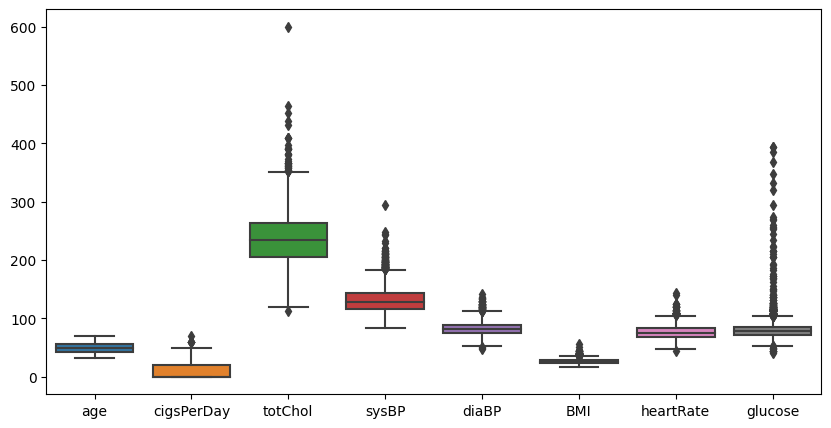

In [26]:
# figsize
plt.figure(figsize=(10,5))
# boxplot of numerical features
sns.boxplot(data=df_cpy[numeric_cols])
plt.show()

As lot of outliers are present since we have limited datapoint hence we are not simply removing the outlier instead of that we are using the clipping method.

In [27]:
# Handling Outliers & Outlier treatments
def clip_outliers(risk_df):
    for col in risk_df[numeric_cols]:
        # using IQR method to define range of upper and lower limit.
        q1 = risk_df[col].quantile(0.25)
        q3 = risk_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        risk_df[col] = risk_df[col].clip(lower_bound, upper_bound)
    return risk_df

In [28]:
# using the function to treat outliers
df_cpy = clip_outliers(df_cpy)

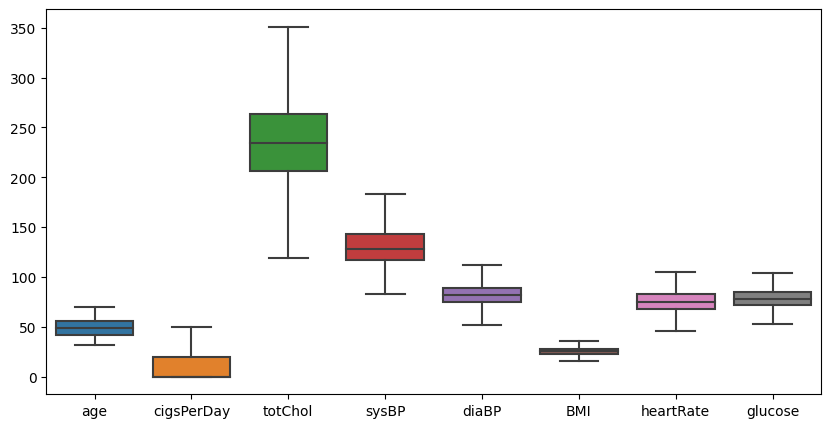

In [29]:
#BoxPlot after clipping outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df_cpy[numeric_cols])
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have implemented **clipping method**.  In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.
Here we have set the threshold of .25-1.5*IQR(Lower limit) and .75+1.5*IQR(Upper limit).

### 3. Categorical Encoding

In [30]:
# Encode your categorical columns
df_cpy['sex']=df_cpy['sex'].map({'M':1,'F':0})
df_cpy['is_smoking']=df_cpy['is_smoking'].map({'YES':1,'NO':0})

In [31]:
# one-hot encode the 'education' feature
education_onehot = pd.get_dummies(df_cpy['education'], prefix='education',drop_first=True)

# drop the original education feature
df_cpy.drop('education', axis=1, inplace=True)

# concatenate the one-hot encoded education feature with the rest of the data
df_cpy = pd.concat([df_cpy, education_onehot], axis=1)
df_cpy.head(3)

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_2.0,education_3.0,education_4.0
1,1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,0,1
2,2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,0,0,0
3,3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,0,0


In [32]:
df_cpy.shape

(3189, 19)

#### What all categorical encoding techniques have you used & why did you use those techniques?

'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes'and 'TenYearCHD' are categorical type of features but already have numeric values.We have encoded the "sex" and "is_smoking" columns to number.As "education" column has 4 unique values ,we converted it to object data type and perform one hot encoding to it.Now there is 19 columns in the data set.  

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)<BR>
**As in dataset we have no textual data so we have skipped this step.**

#### 1. Expand Contraction

In [33]:
# Expand Contraction

#### 2. Lower Casing

In [34]:
# Lower Casing

#### 3. Removing Punctuations

In [35]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [36]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [37]:
# Remove Stopwords

In [38]:
# Remove White spaces

#### 6. Rephrase Text

In [39]:
# Rephrase Text

#### 7. Tokenization

In [40]:
# Tokenization

#### 8. Text Normalization

In [41]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [42]:
# POS Taging

#### 10. Text Vectorization

In [43]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [44]:
# Manipulate Features to minimize feature correlation and create new features
#create a new feature MAP(Mean Arterial Pressure) by using sysBP and diaBP
df_cpy['Pulse_Pressure']=df_cpy['sysBP']-df_cpy['diaBP']
#Dropping sysBP and DiaBP columns
df_cpy.drop(['sysBP','diaBP'],axis=1,inplace=True)

In [45]:
# checking data, weather the provide information is correct or not
df_cpy[(df_cpy.is_smoking == 1) & (df_cpy.cigsPerDay == 0)]

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,education_2.0,education_3.0,education_4.0,Pulse_Pressure


In [46]:
# droping is_smoking column due to multi-collinearity
df_cpy.drop('is_smoking', axis=1, inplace=True)

In [47]:
#Dropping ID column as not relevant
df_cpy.drop('id',axis=1,inplace=True)

In [48]:
df_cpy.shape

(3189, 16)

Now columns are reduced to 16.

In [49]:
#updating the numeric and categorical columns list
numeric_cols.remove('sysBP')
numeric_cols.remove('diaBP')
cate_cols.remove('is_smoking')
numeric_cols.append('Pulse_Pressure')


#### 2. Feature Selection

<Axes: >

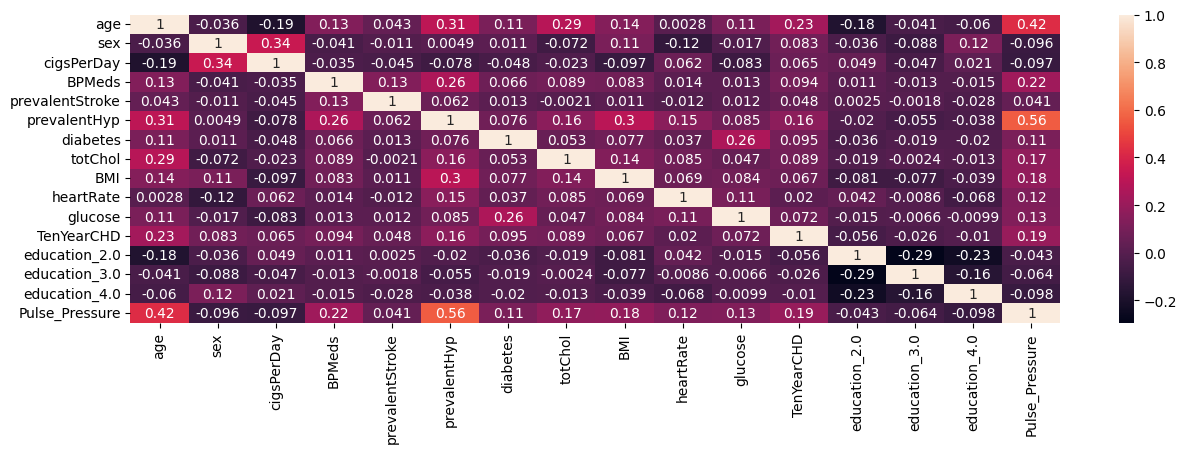

In [50]:
# plotting correlation heatmap to check multicollinearity.
plt.figure(figsize=(15,4))
sns.heatmap(df_cpy.corr(),annot=True)

In [51]:
# Calculating VIF
def calc_vif(X):
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   return(vif)

In [52]:
#Checking VIF of all the columns after excluding high VIF columns
calc_vif(df_cpy[[i for i in df_cpy.describe().columns  if i not in['glucose','BMI','heartRate','totChol','Pulse_Pressure']]])

,variables,VIF
0,age,3.824605
1,sex,2.050037
2,cigsPerDay,1.792894
3,BPMeds,1.127962
4,prevalentStroke,1.027906
5,prevalentHyp,1.692968
6,diabetes,1.049100
7,TenYearCHD,1.258993
8,education_2.0,1.596136
9,education_3.0,1.347768


In [53]:
#Removing high VIF columns and create a new data frame named df_removed
df_removed=df_cpy.drop(['Pulse_Pressure','glucose','BMI','totChol','heartRate'],axis=1)

In [54]:
#updating the numeric column list
del numeric_cols[2:]
numeric_cols

['age', 'cigsPerDay']

In [55]:
df_removed.shape

(3189, 11)

##### What all feature selection methods have you used  and why?

First of all we have checked the VIF of all features and remove the features which are having high VIF(less than 10) and less important wrt. target variable.
    This step is necessary as it saves our model from overfitting by removing multicollnerity.

##### Which all features you found important and why?

After removing collinear features the data frame is left with 11 features which are important for building the model.From which "age" is the most important feature highly correlated with the target variable.  

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

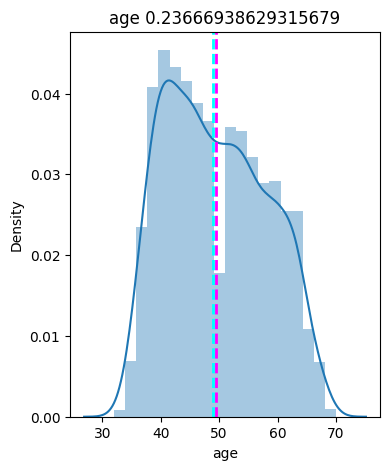

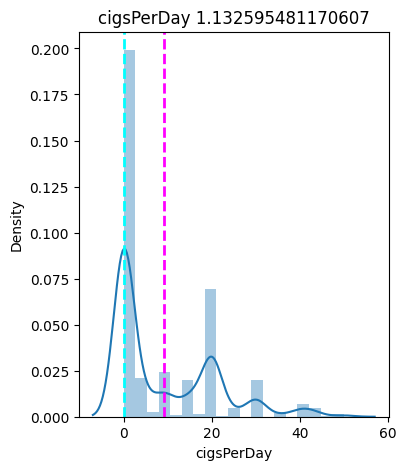

In [56]:
# Transform Your data
# Visualizing code of hist plot for each columns to know the data distibution
for col in numeric_cols:
  fig=plt.figure(figsize=(4,5))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col+' '+str(feature.skew()))
plt.show()

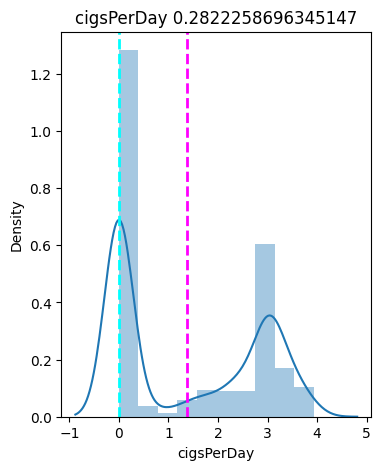

In [57]:
df_removed['cigsPerDay']=np.log1p(df_removed['cigsPerDay'])
fig=plt.figure(figsize=(4,5))
ax=fig.gca()
sns.distplot(df_removed['cigsPerDay'])
ax.axvline(df_removed['cigsPerDay'].mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df_removed['cigsPerDay'].median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('cigsPerDay'+' '+str(df_removed['cigsPerDay'].skew()))
plt.show()

All the numeric features after outliers removal are almost following Gaussian Distribution and having skewness less than 0.5 which seems quite normal.
  But "cigsPerDay" having skewness >1 so i have applied log tranforamtion to make it follow Gaussian Distribution and finally its skewness is reduced less than 0.5

### 6. Data Scaling

In [58]:
#Created X and y dataset
#creating X(independent features) and y(target feature)
X_cols=df_removed.copy()
y=df_removed.TenYearCHD
X_cols.drop('TenYearCHD',axis=1,inplace=True)

In [86]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X = pd.DataFrame(scalar.fit_transform(X_cols), columns = X_cols.columns)
y=y

##### Which method have you used to scale you data and why?

I have used Standard Scaler to scale the indendepent features as all the numeric features are following Gaussian Distribution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required.

Essentially where high dimensions are a problem or where it is a particular point in the algorithm to dimension reduction.

Hard rules are hard to state, other than “after you have tried it, did it improve matters”, which isn’t always the most useful guidance.

Instead, looking at why we might want to do this we can get a bit of insight. Admittedly some of the following might blur together a bit at the edges but the aim is to give a flavour.

1. Our data are too big. 4 million rows. 50,000 columns… is there a lot of redundancy there? Building a model on this could be very expensive. Even relatively simple dimension reduction techniques like PCA can capture almost all of the information in a fraction of the memory if there are strong relationships (that can be linearly approximated) in the data.

2. We are over-fitting. If you build a model with tens of thousands of degrees of freedom but don’t have a lot of examples you can easily overfit. Dimension reduction is one way of handling this, though often not the the best

3. We want to bring in external data. OK, this is a bit different but worth a note. In applications like word2vec we want to build a classifier using an embedding. We may want to classify some text into different categories but with only a limited number of examples. The complexity of free text is vast but a low dimension embedding is much smaller and will not overfit so badly in a classifier. Building a low dimensional embedding on external text, applying it to the text to be classified then building a classifier is using dimension reduction to bring in external data.

4. We suffer from the curse of dimesnionality. Consider something like a nearest neighbour search. As the number of dimensions gets large we see some unwanted behaviour, especially if we are looking at things like euclidean distances. Projecting your data to a lower dimensional space for nearest neighbour, clustering or outlier detection can be both more robust and more meaningful.

5. Some tools are all about this. Collaborative filtering through matrix factorisation is an example. Can we approximately describe behaviour as a linear combination of a smaller number of preferences/behaviours?

In [60]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [87]:
# Split your data to train and test. Choose Splitting ratio wisely.
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0,stratify=y)

In [ ]:
X_train

##### What data splitting ratio have you used and why?

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 70:30 ratio.
As my target variable is highly imbalanced i have used Stratified Sampling so that training and testing set get equal proportion of 1 and 0 class.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

0    2714
1     475
Name: TenYearCHD, dtype: int64
 


<Axes: ylabel='TenYearCHD'>

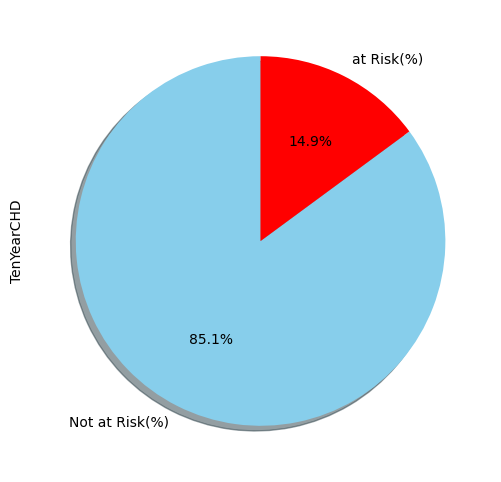

In [62]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(df_removed.TenYearCHD.value_counts())
print(" ")
# Dependant Variable Column Visualization
df_removed['TenYearCHD'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not at Risk(%)','at Risk(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

Here one can easily notice that ~85% persons are safe only ~15% are at risk, so the ratio is 85:15 which is the sign of unbalanced dataset.

In [89]:
# Handling Imbalanced Dataset (If needed)
# Handling class imbalance by oversampling followed by removing the Tomek link
X_smote, y_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)
# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y_train,"Before"],[y_smote,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
0    1900
1     332
Name: TenYearCHD, dtype: int64 

After Handling Class Imbalace:
0    1797
1    1797
Name: TenYearCHD, dtype: int64 



##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) followed by removing the Tomek link for balanced the 85:15 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE.

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method.

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm.

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancing the dataset.

## ***7. ML Model Implementation***

In [90]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''
  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = X_cols.columns
    except:
      importance = np.abs(model.coef_[0])
      feature = X_cols.columns
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    if isinstance(model, SVC):
      report = pd.DataFrame(classification_report(y_true=act,y_pred=pred, output_dict=True))
    else:
      pred_proba = model.predict_proba(x)[:,1]
      report = pd.DataFrame(classification_report(y_true=act,y_pred=pred, output_dict=True))
      fpr, tpr, thresholds = roc_curve(act, pred_proba)


    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
    plt.title(f'{label} Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')

    # AUC_ROC Curve
    if (not(isinstance(model, SVC))):
      plt.subplot(1,3,3)
      plt.plot([0,1],[0,1],'k--')
      plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
      plt.legend(loc=4)
      plt.title(f'{label} AUC_ROC Curve')
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(21,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

### ML Model - 1 Logistic Regression

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
#fit the model
# Fitting the model
lr.fit(X_smote,y_smote)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
analyse_model(lr, X_smote, X_test, y_smote, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid

param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)
# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=5)
# Fit the Algorithm
grid.fit(X_smote, y_smote)
# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)
# Predict on the model
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)
lr_model2.fit(X_smote,y_smote)
analyse_model(lr_model2, X_smote, X_test, y_smote, y_test)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchcv for tuning the hyperparametres.GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there in improvement of 1% in recall score for not risky patients(class 0) i.e. previously it was 67% now it is 68%. Others are same as previous.

### ML Model - 2 Random Forest Classifier

In [ ]:
# ML Model - 2 Implementation
rf_model = RandomForestClassifier(random_state=2)
# Fit the Algorithm
rf_model.fit(X_smote,y_smote)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
analyse_model(rf_model, X_smote, X_test, y_smote, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# HYperparameter Grid
grid = {'n_estimators' : [100,150],
        'max_depth' : [4,6,8],
        'min_samples_split' : [50,80],
        'min_samples_leaf' : [46,60]}

# GridSearch to find the best parameters
rf = GridSearchCV(rf_model, param_grid = grid, scoring = 'recall', cv=5)
# Fit the Algorithm
rf.fit(X_smote, y_smote)
# Analysing the model with best set of parametes
analyse_model(rf, X_smote, X_test, y_smote, y_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Previously for class 0 precision ,recall,f1 score :88%,84%,86% and for class 1 precision,recall,f1 score:26% ,33%,29%<BR>
Now for class 0 precision,recall,f1 score:90%,70%,79% and for class 1 precision,recall,f1 score:25%,57%,35%.<br>Improvement in recall score for class 1 from 33% to 57% which is an important imporvement in this scenerio.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

If we want to completely avoid any situations where the patient has heart disease, a high recall is desired. Whereas if we want to avoid treating a patient with no heart diseases a high precision is desired.
Assuming that in our case the patients who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other ailment, so we want a balance between precision and recall and a high f1 score is desired.
Since we have added synthetic datapoints to handle the huge class imbalance in training set, the data distribution in train and test are different so the high performance of models in the train set is due to the train-test data distribution mismatch and not due to overfitting.


### ML Model - 3  XGBClassifier

In [ ]:
# ML Model - 3 Implementation
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state=2)
# Fit the Algorithm
xgb_clf.fit(X_smote,y_smote)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
analyse_model(xgb_clf, X_smote, X_test, y_smote, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# HYperparameter Grid
grid = {'n_estimators' : [50,80,100],
        'max_depth' : [4,6,8],
        'eta' : [0.05,0.08,0.1]
        }

# Fit the Algorithm
# GridSearch to find the best parameters
xgb = GridSearchCV(xgb_clf, param_grid = grid, scoring = roc_auc_score, cv=5,verbose=2)
xgb.fit(X_smote, y_smote)
# Predict on the model
# Analysing the model with best set of parametes
analyse_model(xgb, X_smote, X_test, y_smote, y_test)


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Previously for class 0 precision ,recall,f1 score :87%,92%,89% and for class 1 precision,recall,f1 score:33% ,23%,27%<BR>
Now for class 0 precision,recall,f1 score:90%,76%,83% and for class 1 precision,recall,f1 score:28%,52%,36%.<br>Improvement in recall score for class 1 from 23% to 52% which is an important imporvement in this scenerio.

###Model 4  Support Vector Classifier

In [91]:
# ML Model - 4 Implementation
svc= SVC(random_state= 0,probability=True)
# Fit the Algorithm
svc.fit(X_smote,y_smote)

SVC(probability=True, random_state=0)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

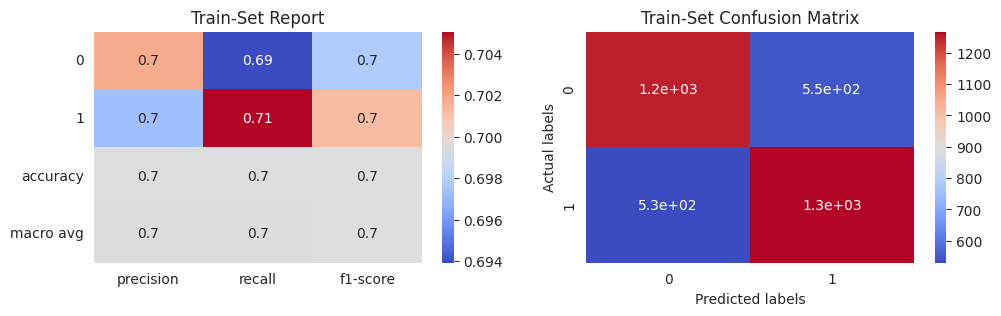

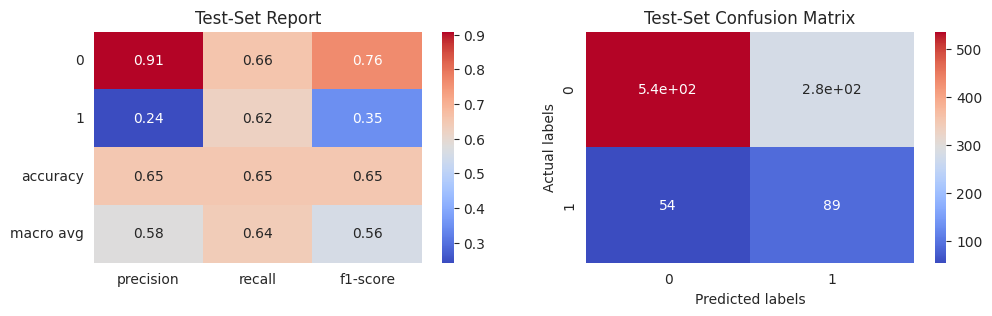

<Figure size 2100x300 with 0 Axes>

SVC(probability=True, random_state=0)

In [92]:
analyse_model(svc, X_smote, X_test, y_smote, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................C=0.1, kernel=rbf, max_iter=1000; total time=   1.7s
[CV] END ...................C=0.1, kernel=rbf, max_iter=1000; total time=   1.7s
[CV] END ...................C=0.1, kernel=rbf, max_iter=1000; total time=   1.6s
[CV] END ...................C=0.1, kernel=rbf, max_iter=1000; total time=   1.8s
[CV] END ...................C=0.1, kernel=rbf, max_iter=1000; total time=   3.1s
[CV] END ..................C=0.1, kernel=poly, max_iter=1000; total time=   1.9s
[CV] END ..................C=0.1, kernel=poly, max_iter=1000; total time=   1.3s
[CV] END ..................C=0.1, kernel=poly, max_iter=1000; total time=   1.2s
[CV] END ..................C=0.1, kernel=poly, max_iter=1000; total time=   1.2s
[CV] END ..................C=0.1, kernel=poly, max_iter=1000; total time=   1.2s
[CV] END ...............C=0.1, kernel=sigmoid, max_iter=1000; total time=   2.2s
[CV] END ...............C=0.1, kernel=sigmoid, ma

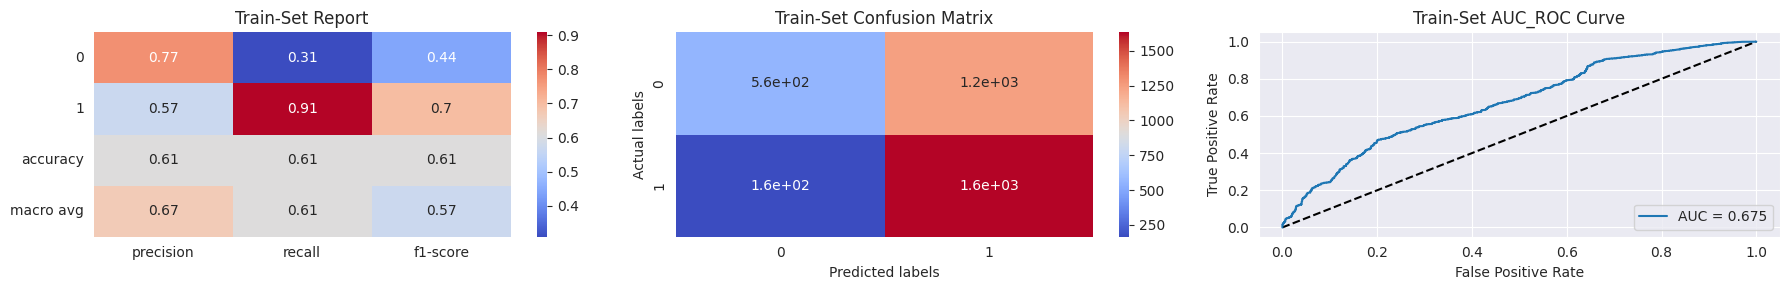

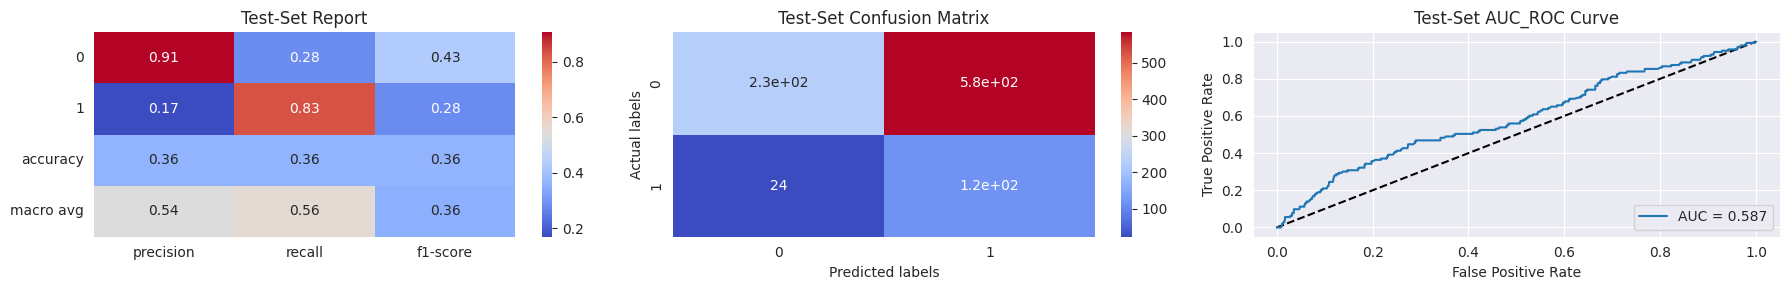

<Figure size 2100x300 with 0 Axes>

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'max_iter': [1000]},
             scoring=<function f1_score at 0x7bea674b6cb0>, verbose=2)

In [93]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# HYperparameter Grid
grid = {'kernel': ["rbf","poly","sigmoid"],
        'C': [0.1,10, 100],
        'max_iter' : [1000]}
svc_clf=SVC(probability=True)
# GridSearch to find the best parameters
svc_grid1=svc_grid = GridSearchCV(svc_clf, param_grid = grid, scoring = f1_score, cv=5,verbose=2)
svc_grid1.fit(X_smote, y_smote)
# Analysing the model with best set of parametes
analyse_model(svc_grid1, X_smote, X_test, y_smote, y_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Previously for class 0 precision ,recall,f1 score :91%,66%,76% and for class 1 precision,recall,f1 score:24% ,62%,35%<BR>
Now for class 0 precision,recall,f1 score:91%,28%,43% and for class 1 precision,recall,f1 score:17%,83%,28%.<br>Improvement in recall score for class 1 from 62% to 83% which is an important imporvement in this scenerio.

###Model 5 KNN Classifer

In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_smote,y_smote)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
analyse_model(knn_clf, X_smote, X_test, y_smote, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# HYperparameter Grid
grid = {'n_neighbors' : [5,7,9],
        'metric' : ['minkowski','euclidean','manhattan']}

# GridSearch to find the best parameters
knn = GridSearchCV(knn_clf, param_grid = grid, scoring = f1_score, cv=5,verbose=1)
knn.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(knn, X_smote, X_test, y_smote, y_test)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

As such there is no improvement in the score after tuning hyperparameters.

###Model 6  Naive Bayes Classifier

In [ ]:
# Fitting Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_smote,y_smote)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
analyse_model(nbc, X_smote, X_test, y_smote, y_test)

###Model 7  Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_smote, y_smote)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
analyse_model(clf, X_smote, X_test, y_smote, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# HYperparameter Grid
grid = {'criterion' : ['gini','entropy'],
        'max_depth':[2,4,6,8],
        'max_leaf_nodes':[2,4,6,8],

       }

# GridSearch to find the best parameters
clf = GridSearchCV(clf, param_grid = grid, scoring = f1_score, cv=5,verbose=1)
clf.fit(X_smote, y_smote)

# Analysing the model with best set of parametes
analyse_model(clf, X_smote, X_test, y_smote, y_test)


In [ ]:
clf.best_params_

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is great imrovement w.r.t. to precision score (class 1) is increased from 27% to 77%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Assuming that in our case the patients who were incorrectly classified as suffering from heart disease are equally important since they could be indicative of some other ailment, so we want a balance between precision and recall and a high f1 score is desired.<Br>If we want to completely avoid any situations where the patient has heart disease, a high recall is desired. Whereas if we want to avoid treating a patient with no heart diseases a high precision is desired.<BR>But a person having disease remain untreated is the dangerous situation so I have selected "RECALL" as important measure.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Best performance of Models on test data based on evaluation metrics for class 1:<BR>
Recall - SVC(83%),Decision tree(77%),Logistic Regression(71%)<BR>
Precision - Naive Bayes Classifier<BR>
F1 Score - Logistic Regression<BR>
Accuracy - Loistic Regression

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model explainability refers to the concept of being able to understand the machine learning model. For example – If a healthcare model is predicting whether a patient is suffering from a particular disease or not. The medical practitioners need to know what parameters the model is taking into account or if the model contains any bias. So, it is necessary that once the model is deployed in the real world. Then, the model developers can explain the model.

Popular techniques for model explainability:

LIME
SHAP
ELI-5
In this project I'll be using SHAP for model explainability. Among the various methods in SHAP I'll be using the SHAP summary plot, which plots features/columns in order of their impact on the predictions and also plots the SHAP values.

In [67]:
!pip install shap==0.40.0
import shap
import graphviz
sns.set_style('darkgrid')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-linux_x86_64.whl size=515084 sha256=3a74788b61ec767f497d9f50cabe33a10123e6d95e79faa5afe6bea85eb9df16
  Stored in directory: /root/.cache/pip/wheels/33/28/e3/62a9dc612c58c1b8d1c16fa51e64941bbb38ac8a6decbad39c
Successfully built shap


In [68]:
X_summary = shap.kmeans(X, 100)
# Create an explainer object
explainer = shap.KernelExplainer(svc_grid1.predict_proba, X_summary)
# Compute the SHAP values for all the samples in the test data
shap_values = explainer.shap_values(X_test)

  0%|          | 0/957 [00:00<?, ?it/s]

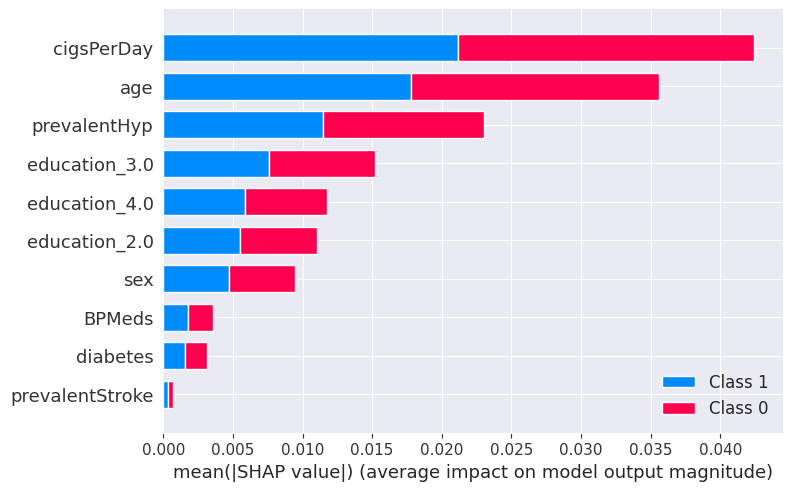

In [69]:
# Summery plot
shap.summary_plot(shap_values, X_test, feature_names=X_cols.columns)


This bar plot shows the important features and the mean shap values. It shows the average impact on the model output magnitude.

It does not show the positive or negative impact on the prediction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [71]:
# Import pickle
import pickle

In [94]:
# Save the File
# Save the best model (Neural Network tuned)
pickle.dump(svc_grid1, open('svc_model.pkl', 'wb'))
# Save the scaler
pickle.dump(scalar, open('scalar.pkl', 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [95]:
# Load the File and predict unseen data.
pickled_model = pickle.load(open('svc_model.pkl', 'rb'))

In [106]:
instance = X_test.iloc[572]

In [107]:
# Create an array for the x test value for the 572 index row
predict_new = np.array(instance).reshape(1,-1)
# Testing on one instance which we used for shap X_test[50,:]
pickled_model.predict(predict_new)

array([1])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, this project demonstrated the potential of machine learning techniques to accurately predict the 10-year risk of future coronary heart disease (CHD) in patients using data from an ongoing cardiovascular study. Key points from this project include:

Careful data preprocessing and transformation improved the performance of machine learning models and enabled more accurate predictions.
Feature selection was important for identifying the most relevant predictors of CHD risk.

The Support Vector Machine model (tuned) was chosen as the final prediction model due to its high recall score.

Since we have added synthetic datapoints to handle the huge class imbalance in training set, the data distribution in train and test are different so the high performance of models in the train set is due to the train-test data distribution mismatch and not due to overfitting.

Techniques such as SMOTE combined with Tomek links undersampling and standard scalar scaling were used to handle imbalanced data and improve model performance.

This project provides a valuable example of how machine learning techniques can be applied to real-world problems to achieve positive business impact.
Overall, this project highlights the importance of careful data preparation and analysis in machine learning projects. By taking the time to clean and transform the data, select relevant features, and choose an appropriate model, it is possible to achieve accurate predictions and support decision-making in a wide range of domains.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***